# HR Analytics Project- Understanding the Attrition in HR

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [33]:
# get the data 
import pandas as pd
data = pd.read_excel(r"C:\Users\91971\Downloads\Attrition.xlsx")
pd.set_option('display.max_columns',None)    # in order to retrive all the columns
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [34]:
data.shape

(1470, 35)

In [35]:
# checking the null values if present in the column
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [36]:
# check the data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
# descriptive analysis of the numerical data
data.describe()     

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


observations:
1. there are int and string type data in the columns, no float value present
2. Initially 26 features are numerical and 9 are categorical data
3. no null vales are present in the data set

In [38]:
data.duplicated().value_counts()
print(len(data))
# no duplicate value are present in the whole data set

1470


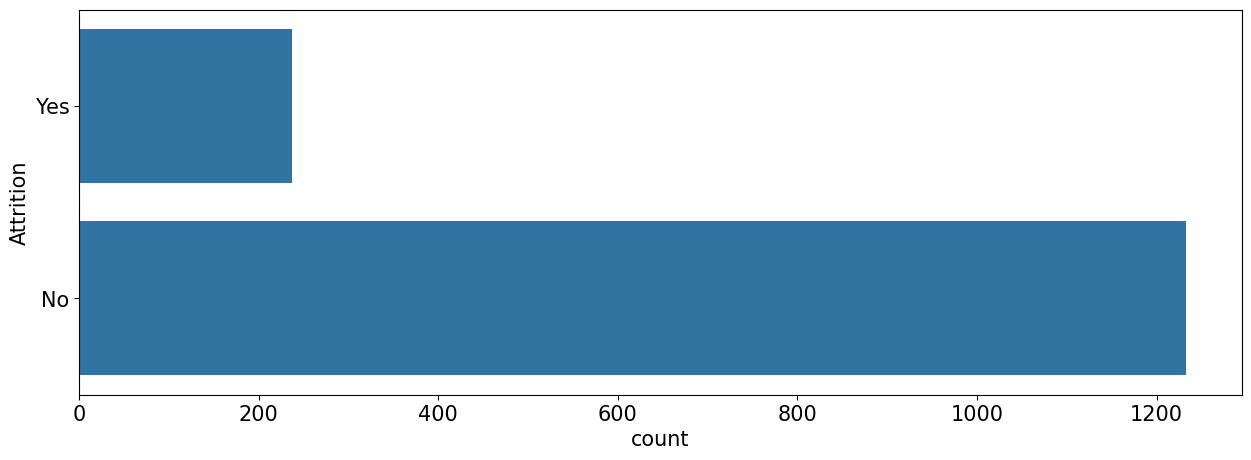

In [39]:
# plotting the target variable
plt.figure(figsize=(15,5))
plt.rc('font',size=15)
sns.countplot(y='Attrition',data=data)
plt.show()

In [40]:
# exploring the data 
unique_value=data['Department'].value_counts()
unique_value

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

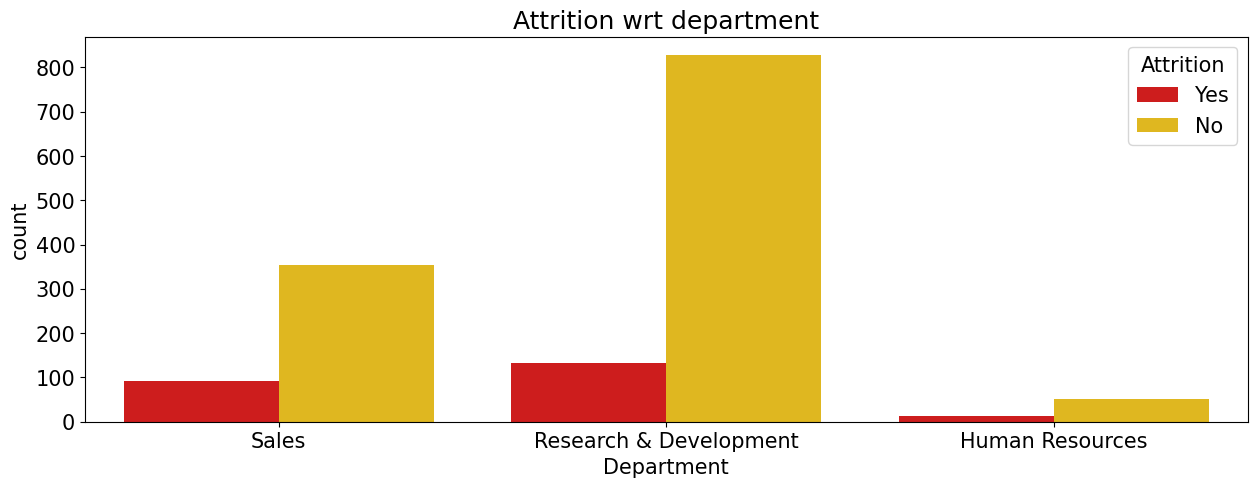

In [41]:
# checking the attrition in each department
plt.figure(figsize=(15,5))
sns.countplot(x='Department',hue='Attrition',data=data,palette='hot')
plt.title("Attrition wrt department")
plt.show()

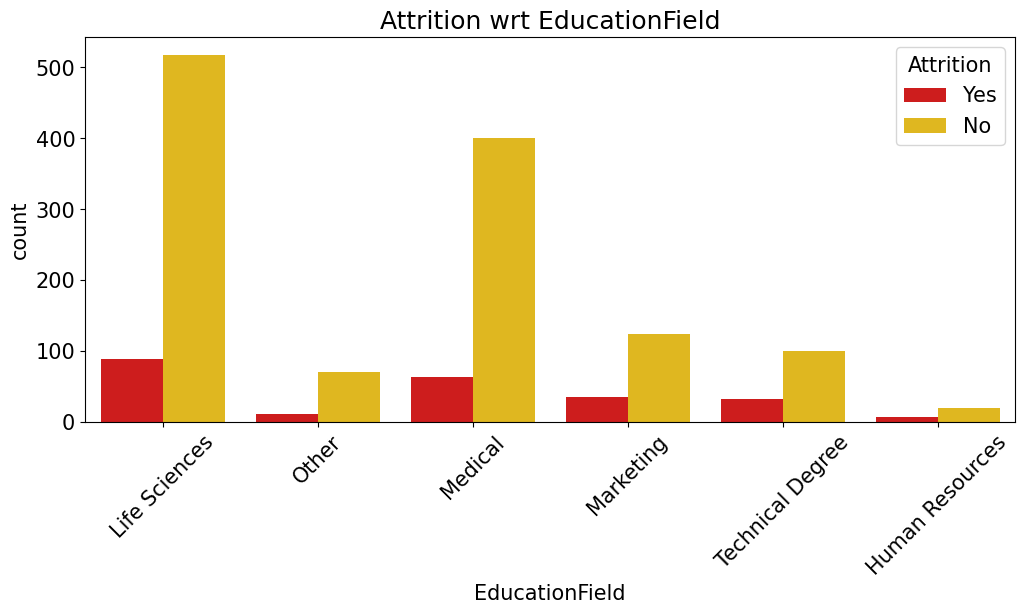

In [42]:
plt.figure(figsize=(12, 5))
sns.countplot(x='EducationField', hue='Attrition', data=data, palette='hot')
plt.title("Attrition wrt EducationField")
plt.xticks(rotation=45)
plt.show()

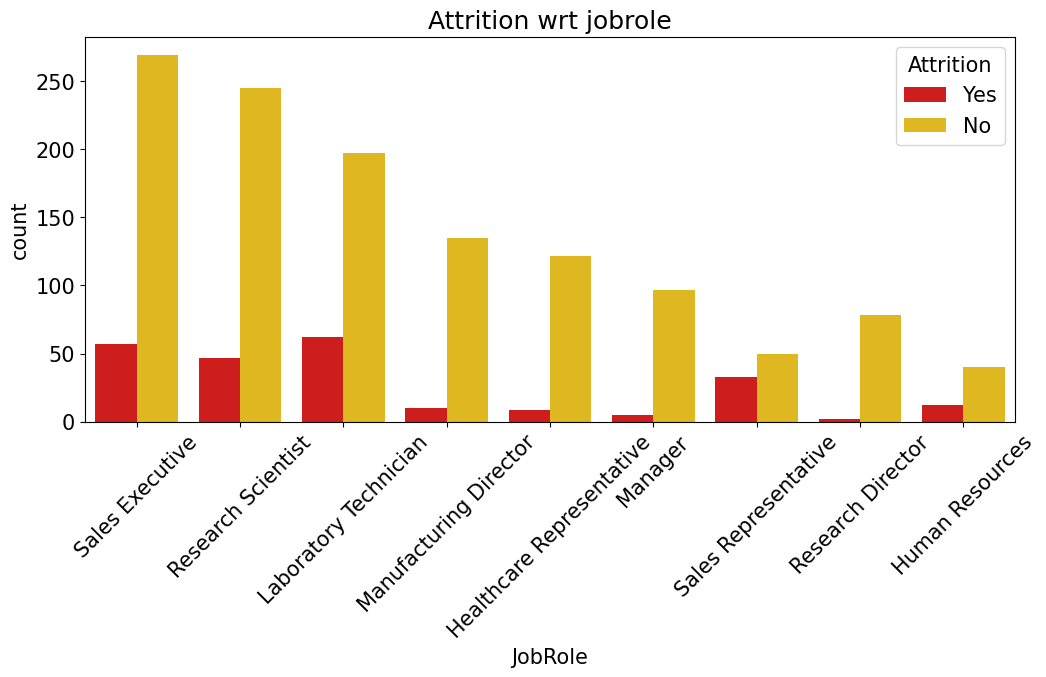

In [43]:
plt.figure(figsize=(12, 5))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='hot')
plt.title("Attrition wrt jobrole")
plt.xticks(rotation=45)
plt.show()

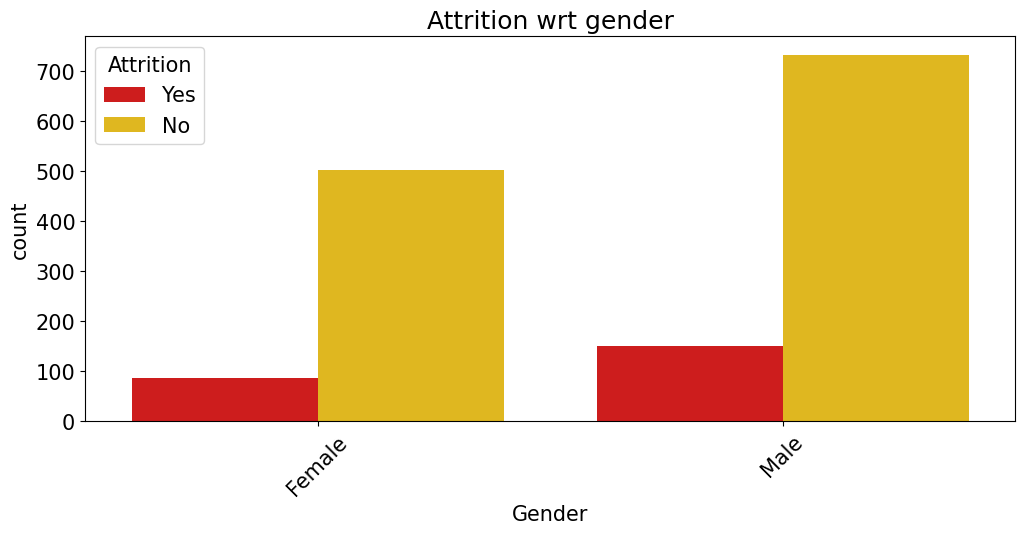

In [44]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Gender', hue='Attrition', data=data, palette='hot')
plt.title("Attrition wrt gender")
plt.xticks(rotation=45)
plt.show()

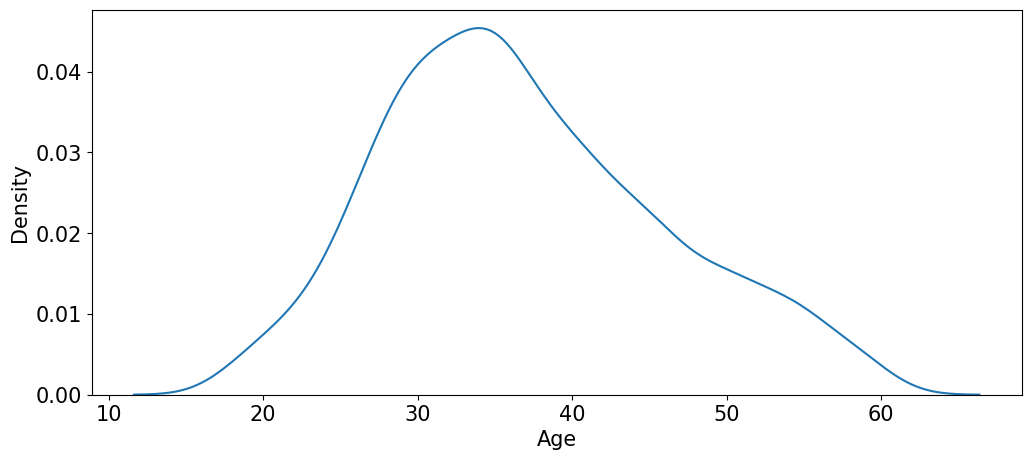

In [45]:
plt.figure(figsize=(12, 5))
sns.distplot(data['Age'], hist=False)
plt.show()

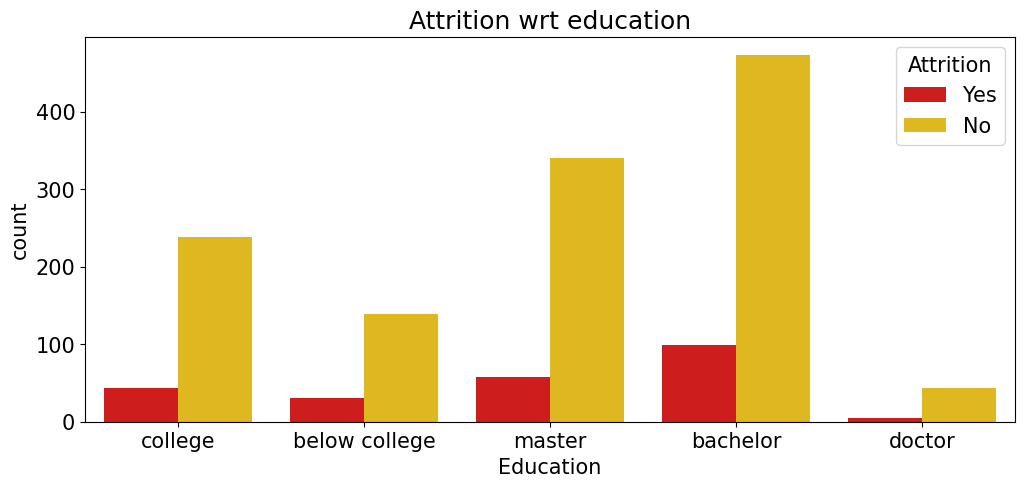

In [46]:
edu_map={1:'below college', 2:'college',3:'bachelor',4:'master', 5:'doctor'}
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Attrition wrt education")
plt.show()

Label encoding:
machines cannot understand the textual data, it needs to be converted into numerical one

In [47]:
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})

In [48]:
data['OverTime']=data['OverTime'].map({'No':0,'Yes':1})
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [49]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [50]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

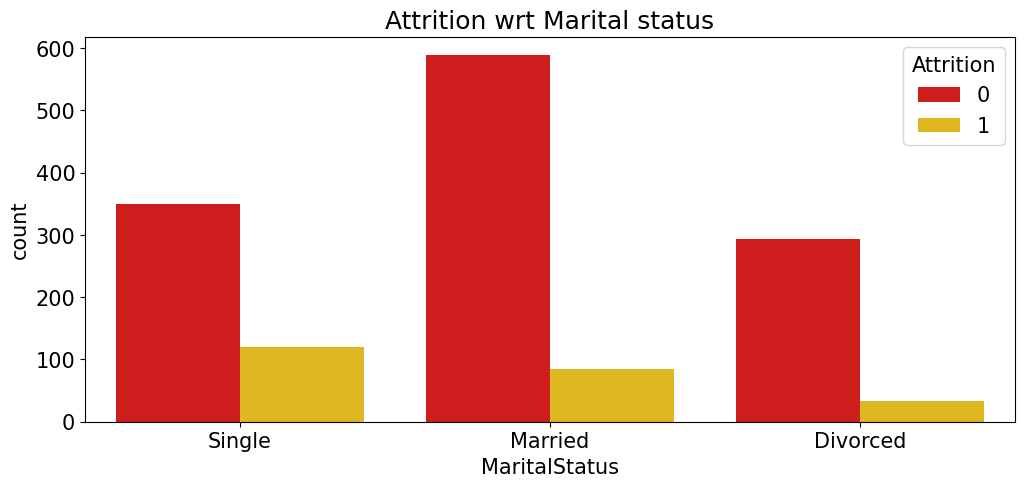

In [51]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['MaritalStatus'], hue='Attrition', data=data, palette='hot')
plt.title("Attrition wrt Marital status")
plt.show()

In [52]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder
encoding=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18']
label_encoder={}
for column in encoding:
    label_encoder[column]=LabelEncoder()
    data[column]=label_encoder[column].fit_transform(data[column])

In [53]:
# Final data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [59]:
# with the help of IQR method finding the outliers in the data
out_features=data[['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
q1=out_features.quantile(0.25)
q3=out_features.quantile(0.75)
IQR=q3-q1
df2=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]

In [60]:
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,4,0,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
9,36,0,2,1299,1,27,3,3,1,13,3,0,94,3,2,0,3,1,5237,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7
11,29,0,2,153,1,15,2,1,1,15,4,1,49,2,2,2,3,2,4193,12682,0,0,1,12,3,4,80,0,10,3,3,9,5,0,8
12,31,0,2,670,1,26,1,1,1,16,1,0,31,3,1,6,3,0,2911,15170,1,0,0,17,3,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,0,325,1,5,3,3,1,2057,2,0,74,3,2,4,1,2,9936,3787,0,0,0,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,0,2,1167,2,5,3,4,1,2060,4,1,30,2,1,8,3,2,2966,21378,0,0,0,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,0,1,884,1,23,2,3,1,2061,3,0,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,0,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [61]:
print("data loss percentage by IQR:",((data.shape[0]-df2.shape[0])/data.shape[0])*100)

data loss percentage by IQR: 56.394557823129254


As the 50% of the data will be lost hence skipping the step

In [62]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,-0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<Axes: >

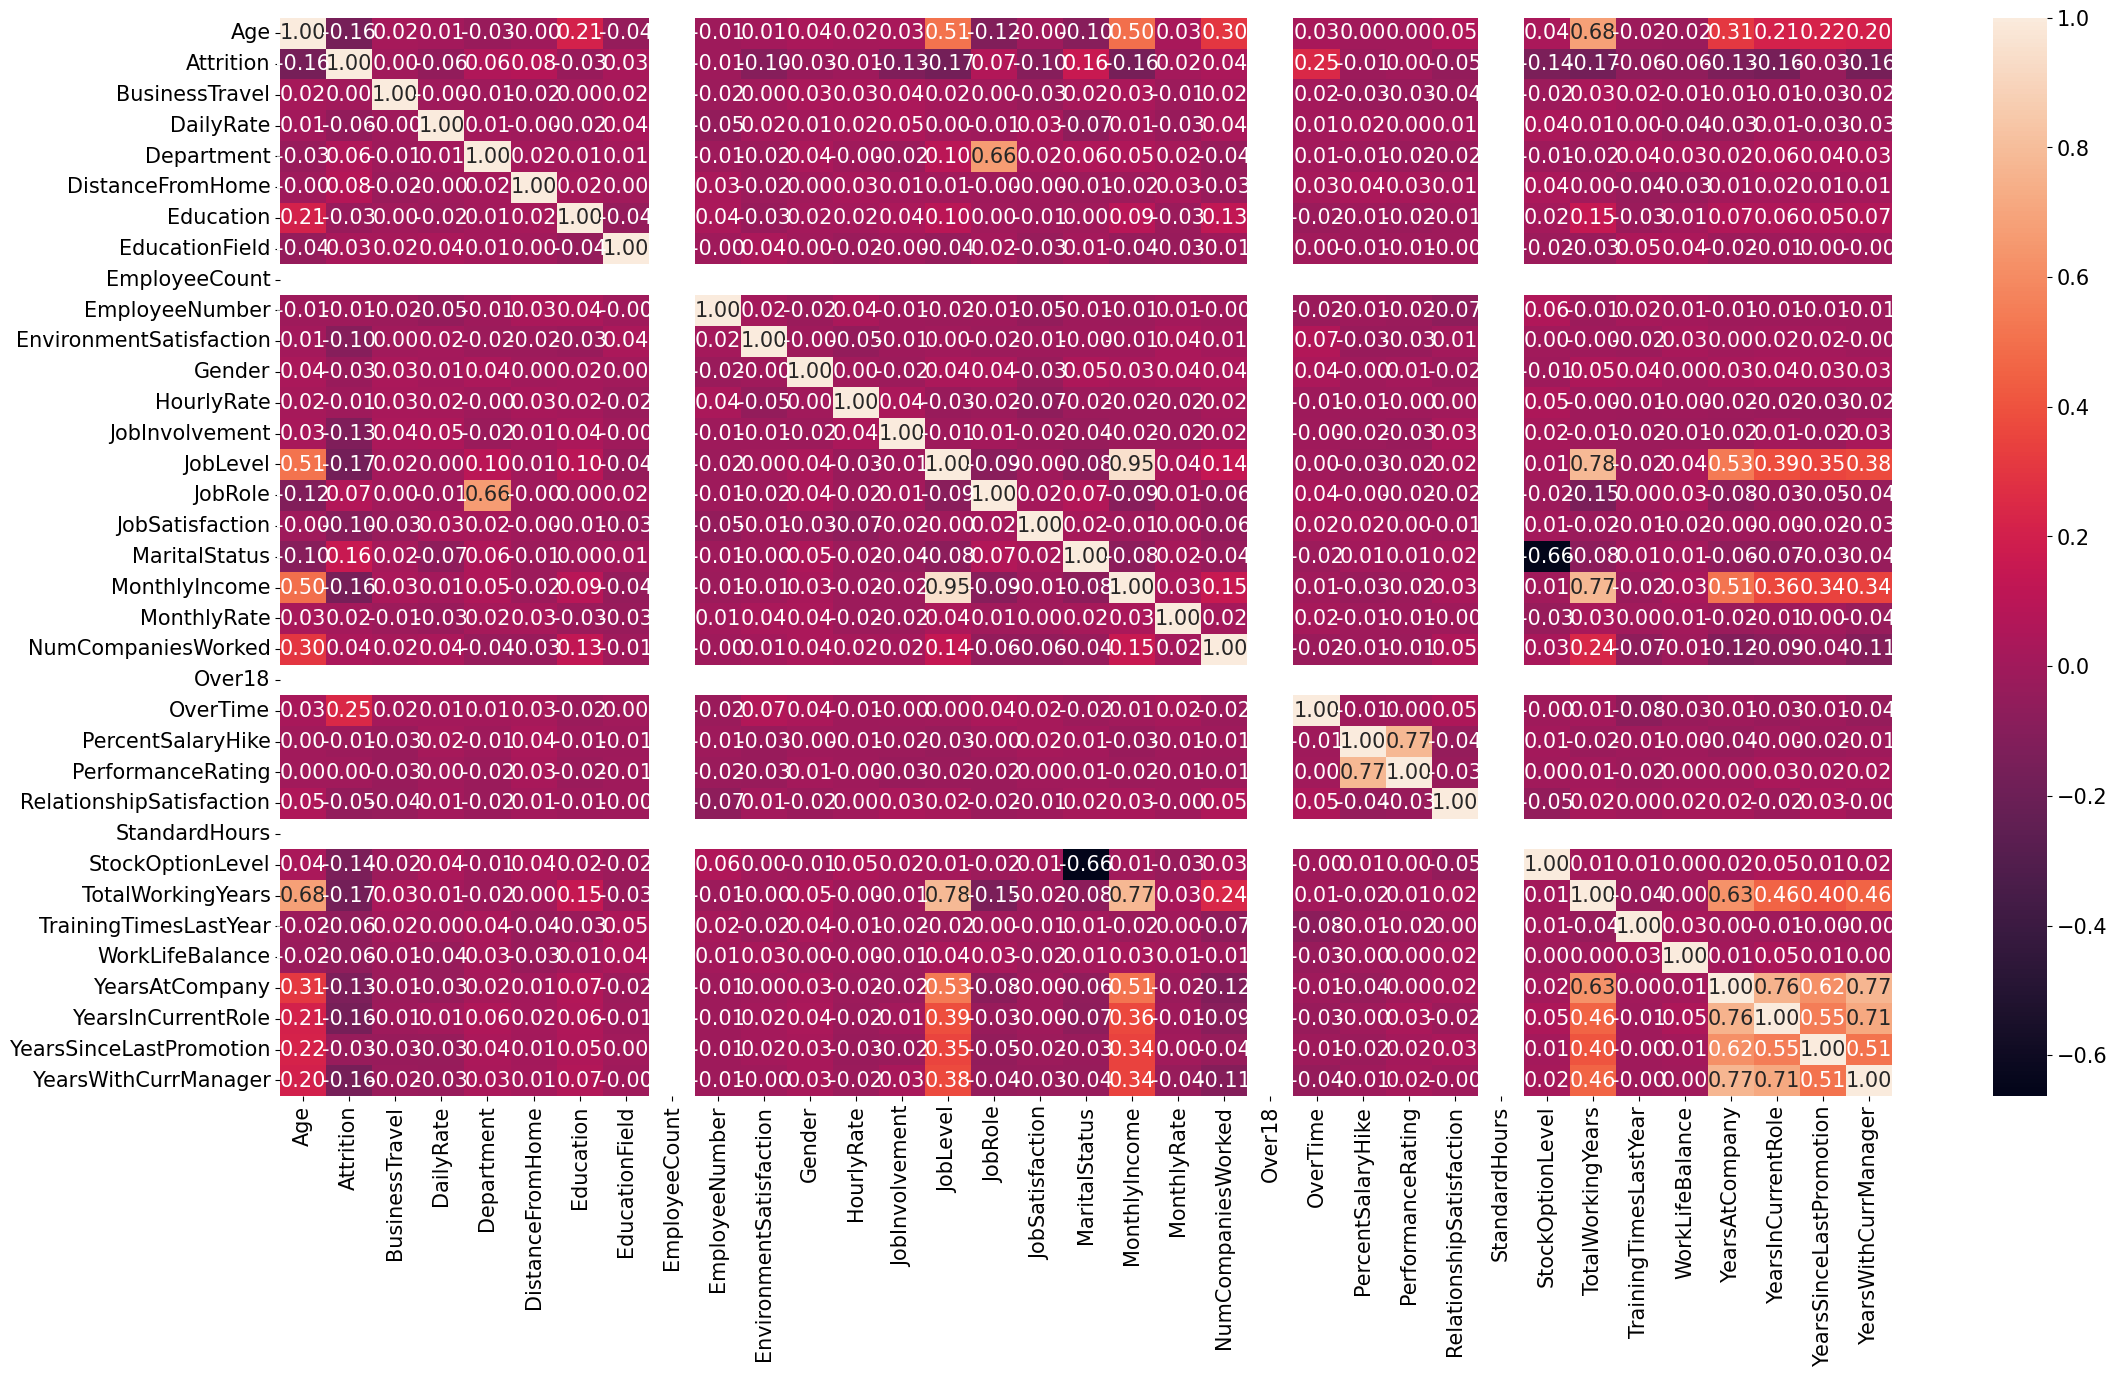

In [63]:
plt.figure(figsize=(26,14))
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

In [64]:
data.corr().Attrition.sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
Gender                     -0.029453
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
NumCompaniesWorked          0.043494
Department                  0.063991
J

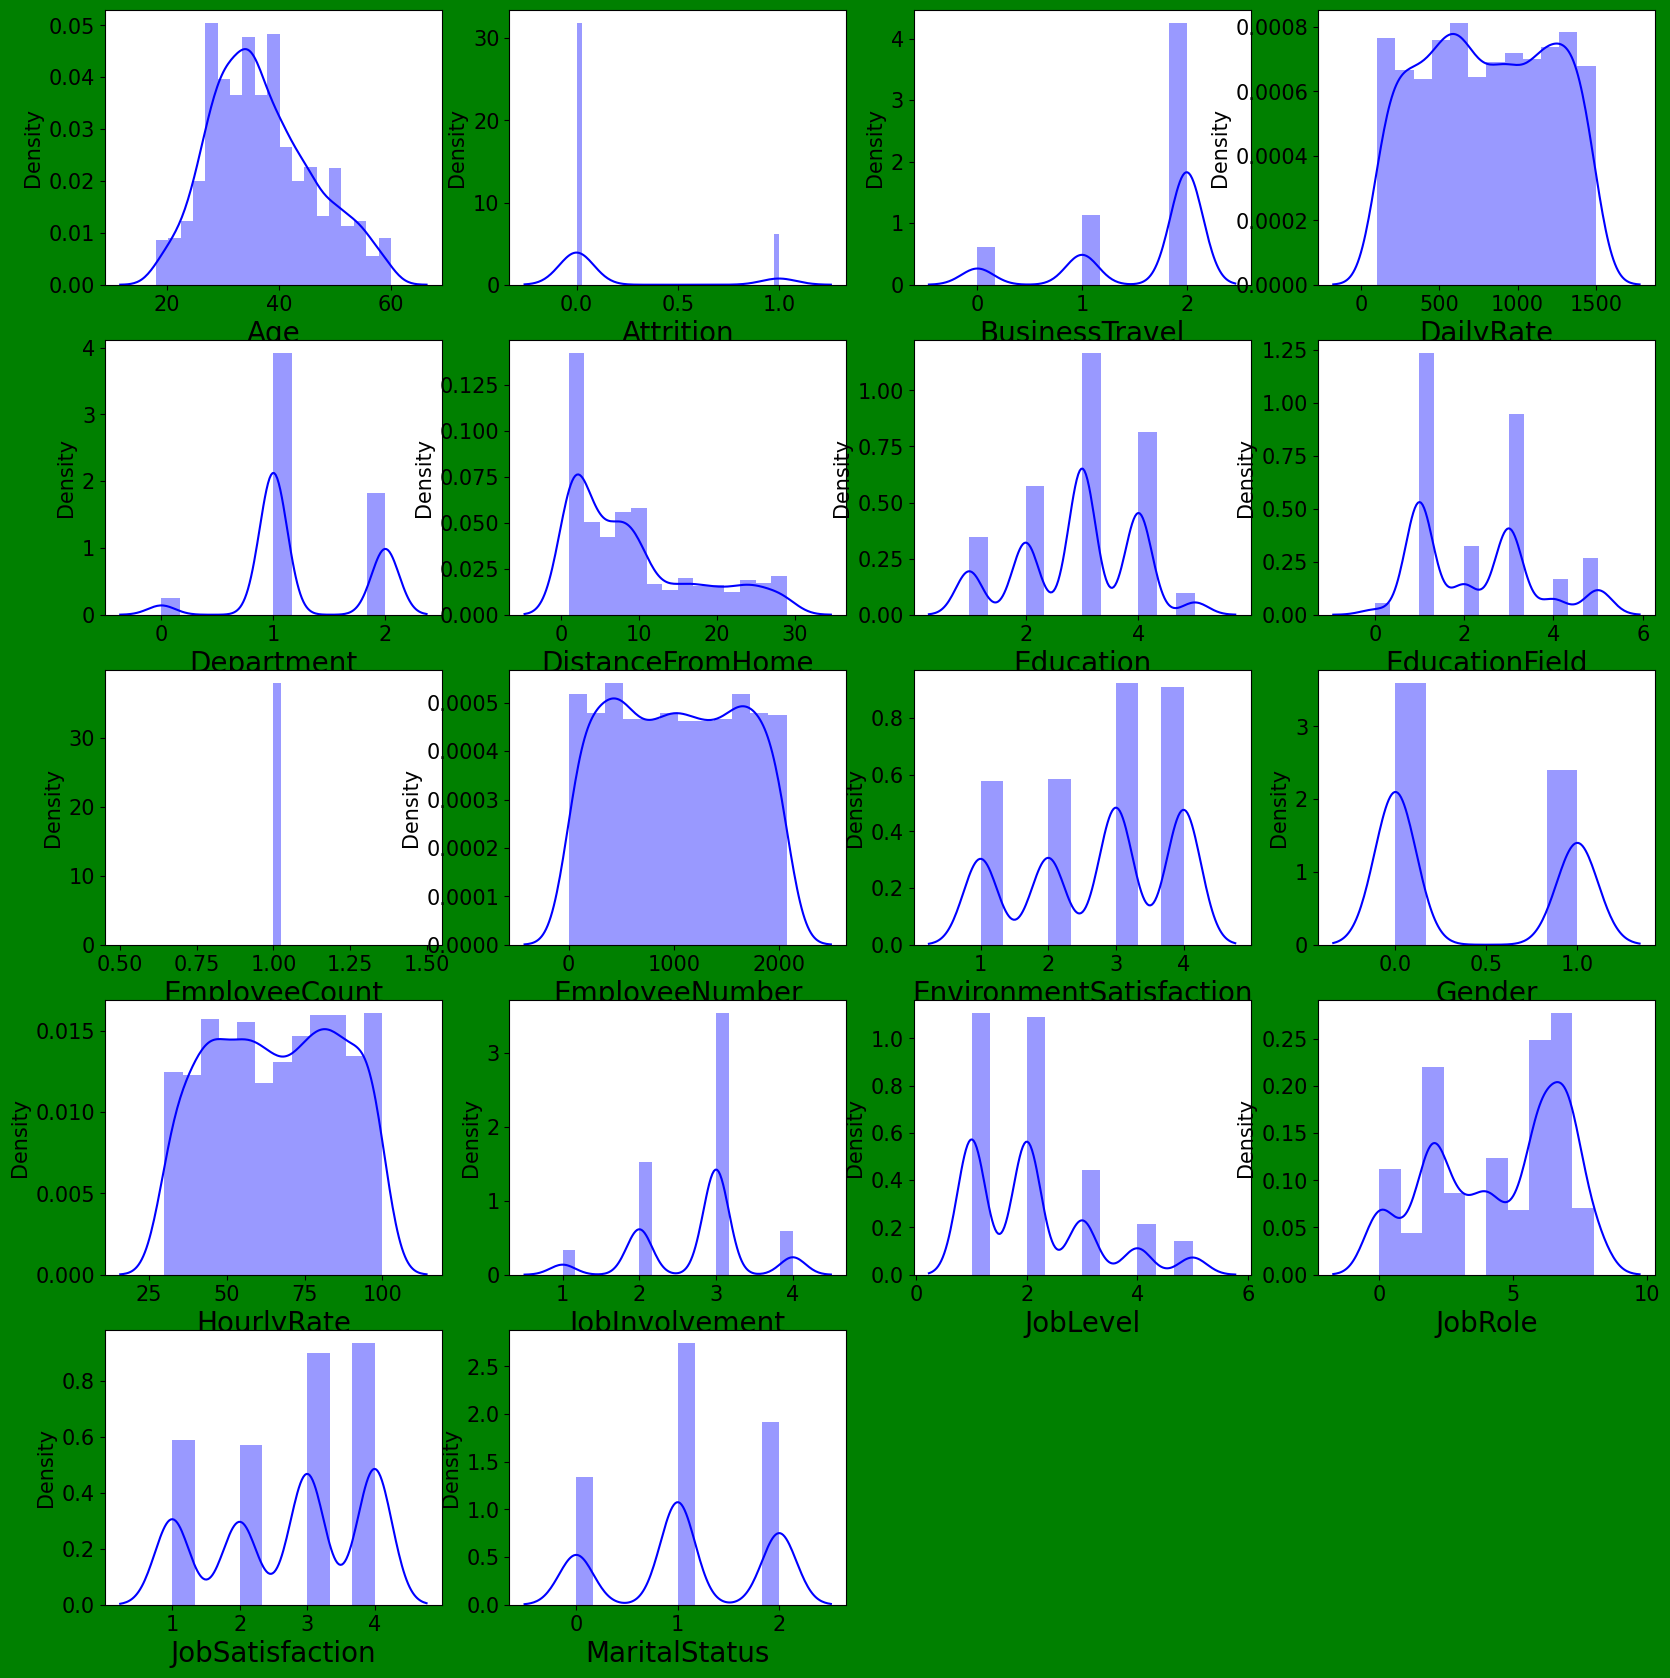

In [65]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [228]:
x=df2.drop(['Attrition'],axis=1)
y=df2['Attrition']
print("feature dimensions",x.shape)
print("label dimension",y.shape)

feature dimensions (641, 34)
label dimension (641,)


In [229]:
#Feature scaling using Standard Scalarisation
#for the evaluation of the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.359850,-0.916802,1.455046,-0.514015,-0.763109,1.069084,-0.926548,0.0,-1.709801,1.151851,1.275558,-0.483767,0.315595,-1.082242,0.550449,0.235215,-0.144556,-0.834570,1.304352,-0.644709,0.0,1.763228,-1.308787,0.0,0.245264,0.0,-1.049348,-0.275788,0.655311,0.322453,0.620626,1.039064,0.810425,-1.219726
1,-0.479242,-0.916802,0.480998,-0.514015,-0.887354,-0.897294,-0.926548,0.0,-1.704835,1.151851,-0.783970,0.634129,0.315595,-1.082242,-1.024720,1.143486,1.259391,-0.779370,-0.321888,-1.098840,0.0,-0.567142,-0.497833,0.0,0.245264,0.0,-1.049348,-0.275788,-0.682442,-1.133126,0.349076,1.039064,0.810425,0.734885
2,-0.001676,0.570970,1.220972,-0.514015,2.218772,0.085895,0.547192,0.0,-1.696558,0.202832,-0.783970,1.363191,0.315595,0.254400,-1.812304,0.235215,-0.144556,-0.026356,0.356684,1.625943,0.0,-0.567142,-0.497833,0.0,-0.690535,0.0,1.825149,1.457350,0.655311,-1.133126,0.349076,1.039064,2.882138,1.060653
3,-0.837416,0.570970,-1.663416,-0.514015,0.727832,-0.897294,-0.926548,0.0,-1.693247,1.151851,1.275558,-0.823996,-1.150322,0.254400,-1.024720,0.235215,1.259391,-0.388802,-0.204113,-1.098840,0.0,1.763228,-0.903310,0.0,1.181063,0.0,-1.049348,0.109354,0.655311,0.322453,0.892176,0.388634,-0.743361,1.386422
4,-0.598633,0.570970,-0.362169,-0.514015,2.094527,-1.880483,-0.926548,0.0,-1.691592,-1.695205,-0.783970,-1.698870,0.315595,-1.082242,0.550449,0.235215,-1.548504,-0.833875,0.154106,-0.644709,0.0,-0.567142,1.124077,0.0,1.181063,0.0,0.387900,-0.853501,-2.020195,-1.133126,-0.194025,-0.587010,1.328353,-0.242421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,-0.598633,-2.404573,-1.230506,-0.514015,-0.514619,0.085895,0.547192,0.0,1.687106,-0.746186,-0.783970,0.391108,0.315595,0.254400,-0.237135,-1.581327,1.259391,1.605001,-1.484804,-1.098840,0.0,-0.567142,1.935031,0.0,-0.690535,0.0,-1.049348,0.109354,-0.682442,0.322453,0.892176,0.063419,-0.225432,1.060653
637,-1.195590,0.570970,0.888739,1.379569,-0.514619,0.085895,1.284062,0.0,1.692072,1.151851,1.275558,-1.747474,-1.150322,-1.082242,1.338033,0.235215,1.259391,-0.814781,1.047926,-1.098840,0.0,-0.567142,1.529554,0.0,1.181063,0.0,-1.049348,-0.853501,-0.682442,0.322453,-0.465575,-0.587010,-0.743361,-1.219726
638,-0.001676,-0.916802,0.176451,-0.514015,1.721792,-0.897294,0.547192,0.0,1.693727,0.202832,-0.783970,-1.212829,1.781513,0.254400,-1.024720,1.143486,-0.144556,-0.951914,-0.260553,0.717682,0.0,-0.567142,1.124077,0.0,0.245264,0.0,0.387900,1.457350,0.655311,0.322453,-0.194025,-0.587010,-0.743361,-0.242421
639,1.550412,-0.916802,0.526303,1.379569,-0.887354,0.085895,0.547192,0.0,1.700349,1.151851,-0.783970,-0.143538,-1.150322,0.254400,0.944241,-0.673056,-0.144556,0.026761,-0.123341,-0.190579,0.0,-0.567142,-0.092355,0.0,1.181063,0.0,-1.049348,1.457350,0.655311,-1.133126,0.892176,0.713849,-0.743361,1.386422


In [230]:
#Checking the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.680867,Age
1,1.023582,BusinessTravel
2,1.044358,DailyRate
3,2.321212,Department
4,1.064355,DistanceFromHome
5,1.134733,Education
6,1.043756,EducationField
7,NaN,EmployeeCount
8,1.048312,EmployeeNumber
9,1.087628,EnvironmentSatisfaction


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [234]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_LR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [235]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [236]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [237]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_GBR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [238]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error',mean_squared_error(y_test,pred_ls))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [239]:
from sklearn.tree import DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [240]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=dtr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_svr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


In [241]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  1.0
R2 score on training data:  100.0
Mean Absolute Error 0.0
Mean Squared Error 0.0
Root mean squared Error 0.0


# Cross Validation Score

In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
score =cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_LR)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [244]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [245]:
 score2 =cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_knn)-score2.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [246]:
score3 =cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [247]:
score4 =cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_ls)-score4.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [248]:
score6 =cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_dtr)-score6.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [249]:
score7 =cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_svr)-score7.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


In [250]:
score8 =cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_etr)-score8.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 score and cross validation score:  0.0


Considering the Decision Tree Regressor due to high accuracy in the result

In [251]:
from sklearn.model_selection import GridSearchCV

# Hyper Parameter Tunning
param={'alpha':[1.0,0.05,0.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [252]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [253]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))      

r2_score:  1.0
Mean Absolute error: 0.0
Mean Squared error: 0.0
Root Mean Squared Error:  0.0


In [254]:
import joblib
#joblib.dump(Model,"hr.pkl")

import pickle
filename='hr.pkl'
pickle.dump(Model,open(filename,'wb'))

In [255]:
import pickle 
loaded_model=pickle.load(open('hr.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

100.0


In [227]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
Predicted,0.175036,0.441439,0.546837,0.279901,0.255788,0.024042,0.308152,0.140903,0.263436,0.035111,-0.251184,0.329055,0.338836,0.160648,0.19534,0.162096,-0.049004,0.362549,0.2097,0.166422,0.232045,0.168804,0.010612,0.356443,0.281095,0.101364,0.515168,0.076598,0.354662,0.211837,0.093321,0.150707,0.026041,0.33592,0.413406,0.26165,0.229527,0.040112,0.150654,0.356835,0.458182,0.254194,-0.251025,0.073659,-0.049913,0.016202,0.276623,0.292826,0.055033,-0.030902,-0.018454,0.063789,0.224143,0.472783,0.215533,0.084651,0.311487,0.351849,0.074171,-0.114465,-0.162506,-0.171088,-0.125198,0.416184,0.033454,0.321633,-0.076009,0.427002,-0.12372,0.150081,0.084821,0.15061,0.170584,0.179478,0.203647,0.411143,0.20818,0.407775,0.296191,0.025164,0.277167,0.161908,0.555883,0.308374,0.47085,0.51749,0.208155,-0.236867,0.373411,0.097262,0.317226,-0.049958,0.244955,0.308409,0.137187,-0.005815,0.195744,0.284629,0.070028,0.165183,0.293252,-0.227486,-0.00194,0.134463,0.337022,0.108353,-0.069934,0.251328,0.325377,0.261401,0.253596,-0.008991,0.195157,0.176149,0.147715,0.420256,0.308203,0.428419,0.24043,-0.148534,-0.031038,0.298807,0.46525,0.138225,0.027728,0.167736,0.224099,0.20789,0.169325,0.02852,-0.05984,-0.091642,0.096366,0.538364,-0.011892,0.032279,0.320074,0.254319,0.144049,0.278856,0.404705,0.159935,0.286761,-0.073247,0.390364,0.157964,0.057115,0.093225,0.426233,0.308328,0.120815,0.348993,0.213858,-0.088578,0.156327,0.290091,0.397112,0.297943,0.035793,0.221682,0.122949,0.512205,0.109452,0.186195,0.318531,-0.063403,0.076589,0.115833,0.143595,0.199363,0.087973,-0.032554,-0.045994,0.182442,0.251054,0.336631,0.206277,0.451332,0.306753,0.467222,0.199361,0.109722,0.089449,0.157885,0.236202,0.267896,0.280417,0.006478,0.273661,-0.038017,0.217727,-0.136989,0.017302,0.352052,0.098908,0.120744,-0.01757,0.244461,-0.036047,0.523091,0.341306,0.082108,0.156038,0.360645,0.114629,0.277515,0.113602,0.342306,0.230209,0.225673,0.130907,0.051811,0.308837,0.099383,0.152025,0.147556,0.511718,0.359826,0.11472,-0.064179,0.255765,0.237971,0.04899,0.122351,0.302471,0.316002,0.048822,0.190754,0.083496,0.282505,0.033163,-0.014802,0.295872,0.079546,0.164833,0.365254,0.049384,0.383471,0.181489,0.223466,-0.057956,0.349522,0.159324,0.043923,-0.008049,0.047093,0.215089,-0.076731,0.308652,0.289575,0.190859,0.507349,0.152709,0.167128,0.045063,0.250493,0.232322,0.3